<font size="5">MICROSOFT MOVIE STUDIO:</font>




<font size="3">Justin Lapidus</font>

<font size="3">Task:
Microsoft has been noticing competition branching out into the movie world. They are seeing the loss of potential earnings the longer they sit out of the competition. They  have been assigned myself with analyzing data and coming up with recommendations to produce movies that will be popular, make money, and create a successful new division of Microsoft </font>




<font size="5">Data</font>

<font size="3">Data was, mainly, collected using three different, but reputable sources. They were collected from "The Numbers", Rotten Tomatoes, and IMDB. 

IMDB:an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals

Rotten Tomatoes: Rotten Tomatoes and the Tomatometer score are the world's most trusted recommendation resources for quality entertainment. As the leading online aggregator of movie and TV show reviews from critics, we provide fans with a comprehensive guide to what's Fresh – and what's Rotten – in theaters and at home.

The Numbers: The Numbers provides detailed movie financial analysis, including box office, DVD, and Blu-ray sales reports, and release schedules.</font>




<font size="5">IMPORTING DATA FROM FILES:</font>


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("im.db")
cur = conn.cursor() 

In [229]:
import gzip
with gzip.open('rt.Reviews.tsv.gz', 'rb', ) as f:
    RT_reviews = f.read

In [153]:
%%bash
sqlite3 im1.db 
.tables

In [188]:
pd.read_sql('''SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%'; '''
           , conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [189]:
movie_basics = pd.read_sql(
''' 
SELECT * 
FROM movie_basics
''', conn)
movie_basics 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000,None


In [190]:
directors = pd.read_sql(
''' 
SELECT * 
FROM directors
''', conn)
directors 



,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [191]:
known_for = pd.read_sql(
''' 
SELECT * 
FROM known_for
''', conn)
known_for 

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [158]:
movie_akas = pd.read_sql(
''' 
SELECT * 
FROM movie_akas
''', conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.000
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.000
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.000
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.000
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.000
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.000
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.000
331700,tt9880178,1,La atención,None,None,original,None,1.000
331701,tt9880178,2,La atención,ES,None,None,None,0.000


In [192]:
persons = pd.read_sql(
''' 
SELECT * 
FROM persons
''', conn)
persons



,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [193]:
principals = pd.read_sql(
''' 
SELECT * 
FROM principals
''', conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [194]:
movie_ratings = pd.read_sql(
''' 
SELECT * 
FROM movie_ratings
''', conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.300,31
1,tt10384606,8.900,559
2,tt1042974,6.400,20
3,tt1043726,4.200,50352
4,tt1060240,6.500,21
...,...,...,...
73851,tt9805820,8.100,25
73852,tt9844256,7.500,24
73853,tt9851050,4.700,14
73854,tt9886934,7.000,5


In [226]:
tmdb_movies= pd.read_csv('tmdb.movies.csv.gz')


In [196]:
Movie_Gross= pd.read_csv('bom.movie_gross.csv.gz')
Movie_Gross


Movie_budgets= pd.read_csv('tn.movie_budgets.csv.gz')

Movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<font size="5">Merging of Data</font>

<font size="3">Merging of data to determine which movie studios generating the most money after taking the production_budget from the worldwide_gross data  </font>



In [323]:
grossbudget= pd.merge(Movie_Gross, Movie_budgets, left_on="title", right_on ="movie", how="inner")

In [342]:
grossbudget

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.000,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","1,068,879,522"
1,Inception,WB,292600000.000,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","835,524,642"
2,Shrek Forever After,P/DW,238700000.000,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.000,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","706,102,828"
4,Iron Man 2,Par.,312400000.000,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.000,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","6,089,100"
1243,Ben is Back,RAtt.,3700000.000,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.000,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","648,599"
1245,Mandy,RLJ,1200000.000,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","1,427,656"


In [358]:
grossbudget['production_budget']= grossbudget['production_budget'].str.strip('$')





In [359]:
grossbudget['worldwide_gross']= grossbudget['worldwide_gross'].replace(',', '', regex=True)
grossbudget['production_budget']= grossbudget['production_budget'].replace(',', '', regex=True)


In [360]:
grossbudget['worldwide_gross']= grossbudget['worldwide_gross'].astype(int)
grossbudget['production_budget']= grossbudget['production_budget'].astype(int)


Money= grossbudget['worldwide_gross']-grossbudget['production_budget']
Moneydivided= Money/(10**9)


In [397]:
grossbudgets = pd.merge(Movie_Gross, Movie_budgets, left_on="title", right_on = "movie", how="inner")

In [259]:
RottenTomatoes= pd.merge(df4, df5, left_on="id", right_on = "id", how="inner")

In [268]:
Movie_Gross
newmoviegross2= Movie_Gross.merge(newmoviedata, how='inner', left_on='title', right_on='title_y', left_index=False)

In [310]:
Newdataframe= pd.merge(MovieGrossTMDB,newmoviedata, on='original_title', how='inner')

In [272]:
newmoviegross= newmoviedata.merge(Movie_Gross, how='inner', left_on='original_title', right_on='title', left_index=False)

In [260]:
Newdataframe=pd.merge(MovieGrossTMDB,newmoviedata, left_on='original_title', right_on='original_title', how= 'inner')

 <font size="5">Reccomendation one: Analyzing the top ten grossing movie studio.</font>


In [394]:
studio= grossbudget['studio'].head(10)

In [237]:
Newmovie=pd.merge(MovieGrossTMDB, movie_basics, right_on = "original_title",left_on='original_title', how = "inner")

In [262]:
MovieGrossTMDB=tmdb_movies.merge(Movie_Gross,how='left',left_on=["original_title","year"], right_on=['title','year'] )

#New Data frame combinbing two dataframes to idenify gross total of movies 



In [238]:
Newmoviedata= pd.merge(Newmovie, Movie_budgets, left_on='original_title', right_on="movie", how = 'outer')

<Axes: xlabel='studio', ylabel='worldwide_gross'>

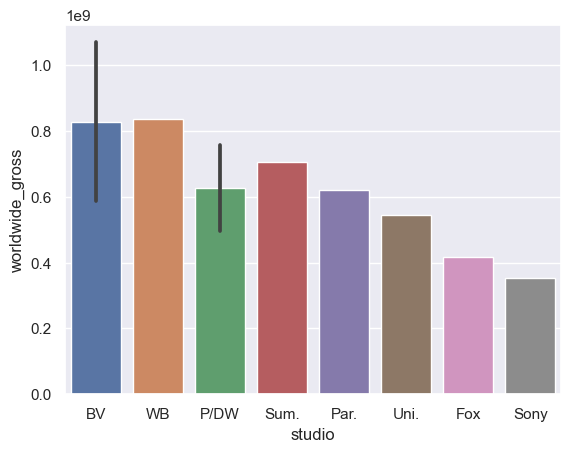

In [414]:
sns.barplot(data=grossbudget, x=studio, y='worldwide_gross')

#Creation of a barplot to show relationship between studio and the money they generated 

In [393]:
rtmovie_info= pd.read_csv('rt.movie_info.tsv.gz',sep='\t')



In [230]:
RT_reviews= pd.read_csv('rt.Reviews.tsv.gz',sep='\t', encoding = 'latin')


In [233]:
df4= RT_reviews
df5= rtmovie_info


In [261]:
tmdb_movies['year'] = pd.to_datetime(tmdb_movies['release_date']).dt.year

In [239]:
newmoviedata= Newmoviedata.drop(['original_language','title_x','start_year','id_y', 'primary_title'], axis=1)

In [265]:
domestic_gross= newmoviedata.domestic_gross_y.head(50)
worldwide_gross=newmoviedata.worldwide_gross.head(50)
productionbudget= newmoviedata.production_budget.head(50)

#Looking at the top fifty earning movies from each column


In [266]:
newmoviedata['production_budget'] = newmoviedata['production_budget'].str.strip('$')
newmoviedata['worldwide_gross'] = newmoviedata['worldwide_gross'].str.strip('$')


newmoviedata['worldwide_gross']=newmoviedata['worldwide_gross'].str.replace(',','')
newmoviedata['production_budget']=newmoviedata['production_budget'].str.replace(',','')



#Eliminating dilimiters in order to change from string to int




In [267]:
newmoviedata.dropna(subset='worldwide_gross')

,Unnamed: 0,genre_ids,id_x,original_title,popularity,release_date_x,vote_average,vote_count,year,title_y,...,domestic_gross_x,foreign_gross,movie_id,runtime_minutes,genres,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
1,1.000,"[14, 12, 16, 10751]",10191.000,How to Train Your Dragon,28.734,2010-03-26,7.700,7610.000,2010.000,How to Train Your Dragon,...,217600000.000,277300000,tt0892769,98.000,"Action,Adventure,Animation","Mar 26, 2010",How to Train Your Dragon,165000000,"$217,581,232",494870992
2,2.000,"[12, 28, 878]",10138.000,Iron Man 2,28.515,2010-05-07,6.800,12368.000,2010.000,Iron Man 2,...,312400000.000,311500000,tt1228705,124.000,"Action,Adventure,Sci-Fi","May 7, 2010",Iron Man 2,170000000,"$312,433,331",621156389
3,4.000,"[28, 878, 12]",27205.000,Inception,27.920,2010-07-16,8.300,22186.000,2010.000,Inception,...,292600000.000,535700000,tt1375666,148.000,"Action,Adventure,Sci-Fi","Jul 16, 2010",Inception,160000000,"$292,576,195",835524642
4,5.000,"[12, 14, 10751]",32657.000,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.100,4229.000,2010.000,NaN,...,NaN,NaN,tt0814255,118.000,"Adventure,Family,Fantasy","Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,95000000,"$88,768,303",223050874
5,7.000,"[16, 10751, 35]",10193.000,Toy Story 3,24.445,2010-06-17,7.700,8340.000,2010.000,Toy Story 3,...,415000000.000,652000000,tt0435761,103.000,"Adventure,Animation,Comedy","Jun 18, 2010",Toy Story 3,200000000,"$415,004,880",1068879522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21293,26425.000,[10402],509306.000,The Box,0.600,2018-03-04,6.000,1.000,2018.000,NaN,...,NaN,NaN,tt1728200,89.000,Drama,"Nov 6, 2009",The Box,25000000,"$15,051,977",34356760
21294,26425.000,[10402],509306.000,The Box,0.600,2018-03-04,6.000,1.000,2018.000,NaN,...,NaN,NaN,tt5047858,100.000,"Drama,War","Nov 6, 2009",The Box,25000000,"$15,051,977",34356760
21296,26425.000,[10402],509306.000,The Box,0.600,2018-03-04,6.000,1.000,2018.000,NaN,...,NaN,NaN,tt5678896,56.000,Thriller,"Nov 6, 2009",The Box,25000000,"$15,051,977",34356760
21321,26092.000,"[35, 16]",546674.000,Enough,0.719,2018-03-22,8.700,3.000,2018.000,NaN,...,NaN,NaN,tt2926198,96.000,"Drama,History","May 24, 2002",Enough,38000000,"$39,177,215",50970660


Creating a new dataframe that has the studios/Gross Income/ and genres in one 

In [275]:

BVmovies= newmoviedata[newmoviedata['studio'] == 'BV']
WBmovies= newmoviedata[newmoviedata['studio'] == 'WB']
Parmovies= newmoviedata[newmoviedata['studio'] == 'Par.']
PDWmovies= newmoviedata[newmoviedata['studio'] == 'P/DW']
Unimovies= newmoviedata[newmoviedata['studio'] == 'Uni.']






<font size="5">Second recomendation: Examining the most profitable genres based upon the top earning studios</font>


In [276]:
TopStudioMovies= pd.concat([WBmovies.head(10), BVmovies.head(10),Parmovies.head(10),Unimovies.head(10),PDWmovies.head(10)], axis=0)

In [365]:
TopStudioMovies

,Unnamed: 0,genre_ids,id_x,original_title,popularity,release_date_x,vote_average,vote_count,year,title_y,...,domestic_gross_x,foreign_gross,movie_id,runtime_minutes,genres,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
3,4.000,"[28, 878, 12]",27205.000,Inception,27.920,2010-07-16,8.300,22186.000,2010.000,Inception,...,292600000.000,535700000,tt1375666,148.000,Action/Adventure,"Jul 16, 2010",Inception,160000000,"$292,576,195",835524642
24,16.000,"[28, 53, 878]",20504.000,The Book of Eli,18.985,2010-01-11,6.700,3495.000,2010.000,The Book of Eli,...,94800000.000,62300000,tt1037705,118.000,Action/Adventure,"Jan 15, 2010",The Book of Eli,80000000,"$94,835,059",158750817
80,52.000,"[80, 18, 53]",23168.000,The Town,13.476,2010-09-17,7.100,2386.000,2010.000,The Town,...,92200000.000,61800000,tt0840361,125.000,Thriller/Horror,"Sep 17, 2010",The Town,37000000,"$92,186,262",152566881
81,52.000,"[80, 18, 53]",23168.000,The Town,13.476,2010-09-17,7.100,2386.000,2010.000,The Town,...,92200000.000,61800000,tt6259458,101.000,Thriller/Horror,"Sep 17, 2010",The Town,37000000,"$92,186,262",152566881
82,53.000,"[28, 37, 18, 14, 53]",20533.000,Jonah Hex,13.467,2010-06-18,4.600,708.000,2010.000,Jonah Hex,...,10500000.000,356000,tt1075747,81.000,Action/Adventure,"Jun 18, 2010",Jonah Hex,47000000,"$10,547,117",11022696
94,72.000,"[35, 18]",41733.000,Due Date,12.445,2010-11-04,6.300,2973.000,2010.000,Due Date,...,100500000.000,111200000,tt1231583,95.000,Action/Adventure,"Nov 5, 2010",Due Date,65000000,"$100,539,043",211739043
114,97.000,"[80, 18, 9648, 53]",12201.000,Edge of Darkness,11.252,2010-01-29,6.300,794.000,2010.000,Edge of Darkness,...,43300000.000,37800000,tt1226273,117.000,Thriller/Horror,"Jan 29, 2010",Edge of Darkness,60000000,"$43,313,890",82812456
122,106.000,"[16, 12, 10751, 14]",41216.000,Legend of the Guardians: The Owls of Ga'Hoole,10.754,2010-09-24,6.600,1223.000,2010.000,Legend of the Guardians: The Owls of Ga'Hoole,...,55700000.000,84400000,tt1219342,97.000,Animation,"Sep 24, 2010",Legend of the Guardians: The Owls of Ga'Hoole,100000000,"$55,675,313",139716717
128,115.000,"[35, 10751, 28, 14]",39691.000,Cats & Dogs: The Revenge of Kitty Galore,10.544,2010-07-30,4.900,273.000,2010.000,Cats & Dogs: The Revenge of Kitty Galore,...,43600000.000,68900000,tt1287468,82.000,Action/Adventure,"Jul 30, 2010",Cats & Dogs: The Revenge of Kitty Galore,85000000,"$43,585,753",113026383
135,126.000,"[28, 12, 80, 9648, 53]",34813.000,The Losers,10.202,2010-04-23,6.200,844.000,2010.000,The Losers,...,23600000.000,5800000,tt0480255,97.000,Action/Adventure,"Apr 23, 2010",The Losers,25000000,"$23,591,432",29863840


<Axes: xlabel='studio', ylabel='worldwide_gross'>

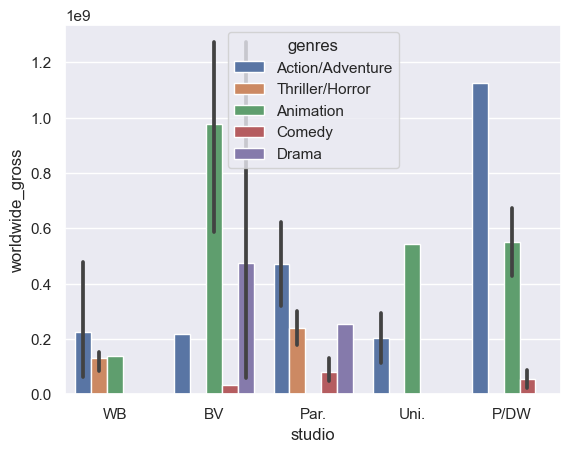

In [366]:

sns.set_theme(style="darkgrid")
sns.barplot(x = TopStudioMovies['studio'], hue = TopStudioMovies['genres'], y=TopStudioMovies["worldwide_gross"])

Retitling the data into common genere themes

In [281]:
TopStudioMovies['genres'] = TopStudioMovies['genres'].replace(['Action,Adventure,Drama','Action,Drama','Action,Drama,Fantasy','Action,Adventure,Sci-Fi','Action,Adventure,Sci-Fi','Adventure,Comedy','Action,Comedy,Family','Action,Adventure,Crime','Action,Adventure,Sci-Fi','Action,Adventure,Family','Action,Adventure,History','Action,Adventure,Fantasy','Action,Adventure,Thriller'],'Action/Adventure')
TopStudioMovies['genres'] = TopStudioMovies['genres'].replace(['Crime,Drama,Thriller','Mystery,Thriller','Drama,Fantasy,Horror','Mystery Thriller','Horror', 'Crime,Drama,Mystery', 'Drama,Fantasy Horror'],'Thriller/Horror')
TopStudioMovies['genres'] = TopStudioMovies['genres'].replace(['Action,Adventure,Animation','Animation,Comedy,Family','Adventure,Animation,Comedy','Adventure,Animation,Comedy','Adventure,Animation,Comedy', ' Action,Adventure,Animation','Adventure,Animation,Comedy','Action,Animation,Comedy'],'Animation')
TopStudioMovies['genres'] = TopStudioMovies['genres'].replace(['Action Drama Fantasy','Adventure,Drama,Sport','Drama,Music,Romance','Biography,Drama,Family','Adventure,Drama,Western'],'Drama')
TopStudioMovies['genres'] = TopStudioMovies['genres'].replace(['Comedy,Family,Romance','Comedy,Romance','Biography,Drama,Sport','Comedy,Drama','Comedy','Comedy,Drama,Romance'],'Comedy')


In [319]:
 TopStudioMovies.dropna(subset='worldwide_gross')

,Unnamed: 0,genre_ids,id_x,original_title,popularity,release_date_x,vote_average,vote_count,year,title_y,...,domestic_gross_x,foreign_gross,movie_id,runtime_minutes,genres,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
3,4.000,"[28, 878, 12]",27205.000,Inception,27.920,2010-07-16,8.300,22186.000,2010.000,Inception,...,292600000.000,535700000,tt1375666,148.000,Action/Adventure,"Jul 16, 2010",Inception,160000000,"$292,576,195",835524642
24,16.000,"[28, 53, 878]",20504.000,The Book of Eli,18.985,2010-01-11,6.700,3495.000,2010.000,The Book of Eli,...,94800000.000,62300000,tt1037705,118.000,Action/Adventure,"Jan 15, 2010",The Book of Eli,80000000,"$94,835,059",158750817
80,52.000,"[80, 18, 53]",23168.000,The Town,13.476,2010-09-17,7.100,2386.000,2010.000,The Town,...,92200000.000,61800000,tt0840361,125.000,Thriller/Horror,"Sep 17, 2010",The Town,37000000,"$92,186,262",152566881
81,52.000,"[80, 18, 53]",23168.000,The Town,13.476,2010-09-17,7.100,2386.000,2010.000,The Town,...,92200000.000,61800000,tt6259458,101.000,Thriller/Horror,"Sep 17, 2010",The Town,37000000,"$92,186,262",152566881
82,53.000,"[28, 37, 18, 14, 53]",20533.000,Jonah Hex,13.467,2010-06-18,4.600,708.000,2010.000,Jonah Hex,...,10500000.000,356000,tt1075747,81.000,Action/Adventure,"Jun 18, 2010",Jonah Hex,47000000,"$10,547,117",11022696
94,72.000,"[35, 18]",41733.000,Due Date,12.445,2010-11-04,6.300,2973.000,2010.000,Due Date,...,100500000.000,111200000,tt1231583,95.000,Action/Adventure,"Nov 5, 2010",Due Date,65000000,"$100,539,043",211739043
114,97.000,"[80, 18, 9648, 53]",12201.000,Edge of Darkness,11.252,2010-01-29,6.300,794.000,2010.000,Edge of Darkness,...,43300000.000,37800000,tt1226273,117.000,Thriller/Horror,"Jan 29, 2010",Edge of Darkness,60000000,"$43,313,890",82812456
122,106.000,"[16, 12, 10751, 14]",41216.000,Legend of the Guardians: The Owls of Ga'Hoole,10.754,2010-09-24,6.600,1223.000,2010.000,Legend of the Guardians: The Owls of Ga'Hoole,...,55700000.000,84400000,tt1219342,97.000,Animation,"Sep 24, 2010",Legend of the Guardians: The Owls of Ga'Hoole,100000000,"$55,675,313",139716717
128,115.000,"[35, 10751, 28, 14]",39691.000,Cats & Dogs: The Revenge of Kitty Galore,10.544,2010-07-30,4.900,273.000,2010.000,Cats & Dogs: The Revenge of Kitty Galore,...,43600000.000,68900000,tt1287468,82.000,Action/Adventure,"Jul 30, 2010",Cats & Dogs: The Revenge of Kitty Galore,85000000,"$43,585,753",113026383
135,126.000,"[28, 12, 80, 9648, 53]",34813.000,The Losers,10.202,2010-04-23,6.200,844.000,2010.000,The Losers,...,23600000.000,5800000,tt0480255,97.000,Action/Adventure,"Apr 23, 2010",The Losers,25000000,"$23,591,432",29863840


<font size="5">Action Movie Data</font>

<font size="3">Creation of a new data frame containing only action movies from the top three studios. From there the information is going to be reassigned by whether the movie grossed over the mean score. If the movie earns more than the mean it will be determined to be successful or not successful.    
</font>


In [399]:
disney = newmoviegross2[newmoviegross2['studio_x'].isin(['BV','WB', 'Par.'])]

    

In [400]:
disney.dropna(subset = ['genres'], inplace = True)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95575/908626961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney.dropna(subset = ['genres'], inplace = True)


In [401]:
disney['genres'] = disney['genres'].apply(lambda x: x.split(','))

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95575/1506458889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['genres'] = disney['genres'].apply(lambda x: x.split(','))


In [402]:
disney['genre1'] = disney['genres'].apply(lambda x: x[0])

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95575/726305095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['genre1'] = disney['genres'].apply(lambda x: x[0])


In [403]:
action = disney.loc[disney['genre1']=='Action']

In [404]:
action.dropna(subset = ['worldwide_gross'], inplace = True)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95575/907924199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action.dropna(subset = ['worldwide_gross'], inplace = True)


In [405]:
action['worldwide_gross'] =action['worldwide_gross'].apply(lambda x: int(x))

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95575/3309173416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action['worldwide_gross'] =action['worldwide_gross'].apply(lambda x: int(x))


In [407]:
action['worldwide_gross'].mean()

428453316.4411765

In [408]:
action['over_mean'] = ''



/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95575/3898943411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action['over_mean'] = ''


In [409]:
action.loc[action['worldwide_gross'] > action['worldwide_gross'].mean() , 'over_mean'] = 'sucessful'


<font size="5"> Third Recomnedation :Successful vs. Unsuccesful Movies<font>

<font size="3">Determined by looking at the distribution of succesful and unsucccesful movies compared to their runtime</font>




In [410]:
action.loc[action['worldwide_gross'] <= action['worldwide_gross'].mean() , 'over_mean'] = 'unsucessful'

<Axes: xlabel='runtime_minutes', ylabel='Density'>

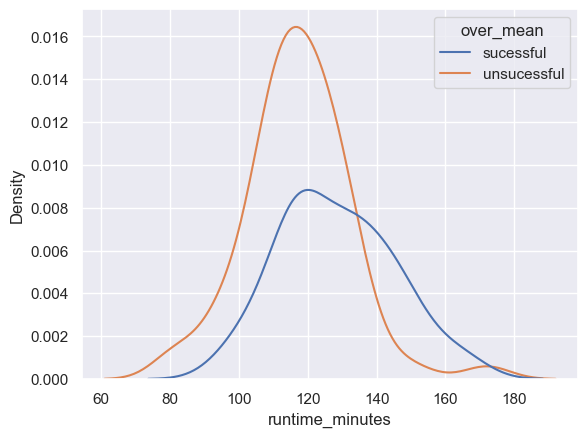

In [411]:
sns.kdeplot(data  = action, x = 'runtime_minutes', hue = 'over_mean')



<Axes: xlabel='runtime_minutes', ylabel='over_mean'>

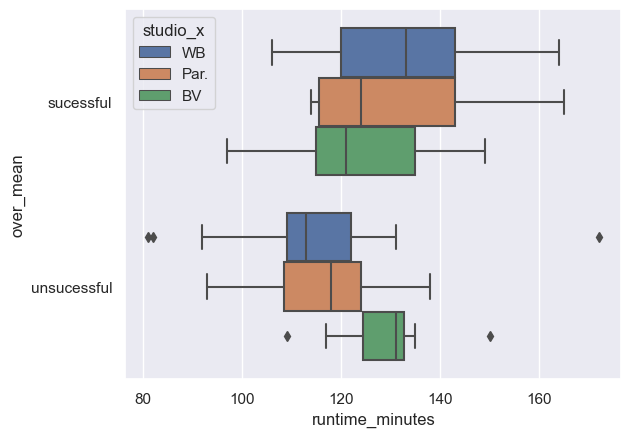

In [412]:
sns.boxplot(x=action["runtime_minutes"],y=action['over_mean'], hue=action['studio_x'] )